In [1]:
!pip install -U -q PyDrive

In [ ]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
!mkdir data

In [5]:
file_id = '1KiOvhsdjJqaUCLJa5adZXEtQ_72s8Eb6'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('data/checking-logs.sqlite')

In [6]:
conn = sqlite3.connect('data/checking-logs.sqlite')

In [7]:
df = pd.io.sql.read_sql(
    """
    select uid, numTrials, timestamp
    from checker
    where uid like 'user_%' and status = 'ready' and labname = 'project1'
    order by uid
    """,
    conn, parse_dates=['timestamp']
    )

In [8]:
conn.close()

In [9]:
df.head()

,uid,numTrials,timestamp
0,user_1,1,2020-05-14 20:56:08.898880
1,user_1,2,2020-05-14 20:58:02.313690
2,user_1,3,2020-05-14 20:58:46.322457
3,user_1,4,2020-05-14 21:08:15.434237
4,user_1,5,2020-05-14 21:10:14.867603


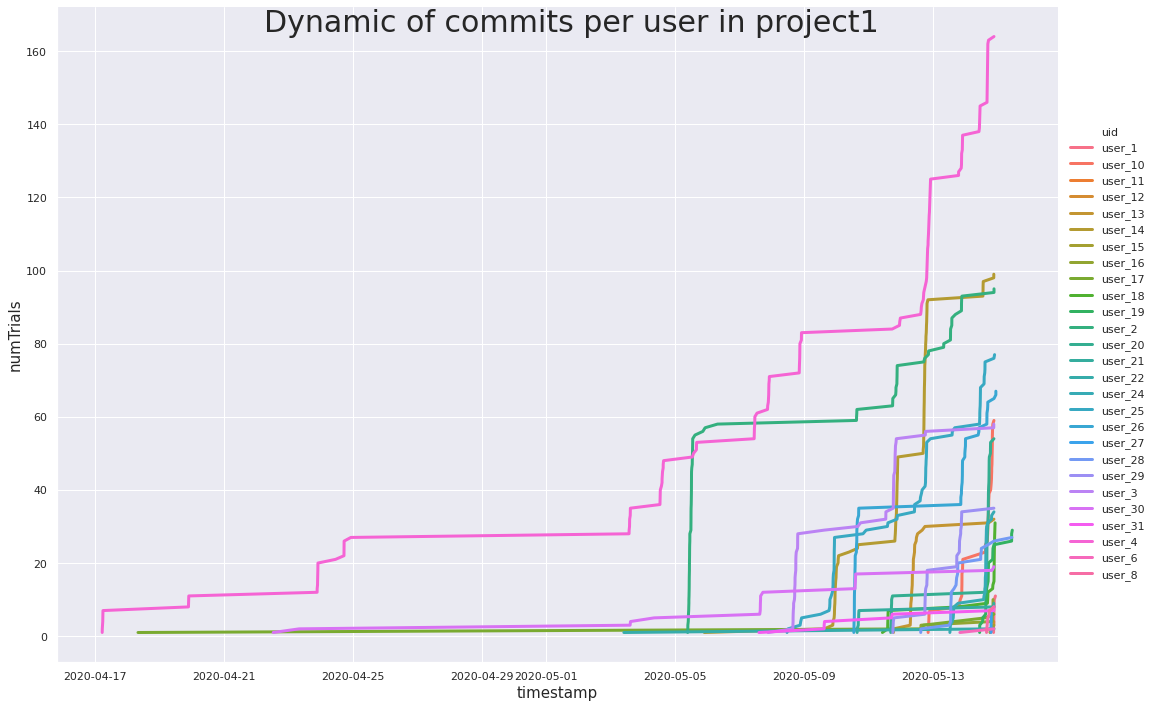

In [10]:
sns.set(palette='cool', rc={'axes.labelsize': 15, 'lines.linewidth': 3})
sns.relplot(x='timestamp', y='numTrials', hue='uid', data=df, legend='full',
            kind='line', height=10, aspect=1.5)
plt.suptitle('Dynamic of commits per user in project1', fontsize=30)
plt.show()

Большую часть времени пользователь user_1 был лидером по количеству коммитов. После него длительный промежуток времени был лидером пользователь user_2.